# Module 4 : Performance measurements of  DecisionTree:

In [2]:
import pandas as pd

In [3]:
!pip install imblearn

In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# warning
import warnings
warnings.filterwarnings("ignore")

In [7]:
# load given data
data= pd.read_csv(r'/Users/sreekarsontam/Desktop/liver/doc/liver_patient (1).csv')

In [8]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [9]:
data.duplicated().sum()

13

In [10]:
data.shape

(583, 11)

In [11]:
data = data.drop_duplicates()

In [12]:
data.shape

(570, 11)

In [13]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [14]:
df=data.dropna()

In [15]:
df.shape

(566, 11)

In [16]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [17]:
#changing feature name
df = df.rename({'Dataset': 'Result'}, axis=1) 

In [18]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Result'],
      dtype='object')

In [19]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i]).astype(int)


In [20]:
df.Result.value_counts()

1    404
2    162
Name: Result, dtype: int64

In [21]:
df.corr()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Result
Age,1.000000,0.057542,0.010704,0.006268,0.080085,-0.084319,-0.017352,-0.195893,-0.269448,-0.215967,-0.133821
Gender,0.057542,1.000000,0.089068,0.100448,-0.024879,0.083336,0.080593,-0.092049,-0.093208,-0.005611,-0.077396
Total_Bilirubin,0.010704,0.089068,1.000000,0.873975,0.205286,0.216776,0.238167,-0.008423,-0.223979,-0.207740,-0.224467
Direct_Bilirubin,0.006268,0.100448,0.873975,1.000000,0.233653,0.236731,0.257965,-0.000735,-0.230650,-0.201519,-0.250926
Alkaline_Phosphotase,0.080085,-0.024879,0.205286,0.233653,1.000000,0.125917,0.166609,-0.028623,-0.166287,-0.236251,-0.186057
Alamine_Aminotransferase,-0.084319,0.083336,0.216776,0.236731,0.125917,1.000000,0.791754,-0.035104,-0.026890,-0.006525,-0.161617
Aspartate_Aminotransferase,-0.017352,0.080593,0.238167,0.257965,0.166609,0.791754,1.000000,-0.022114,-0.084821,-0.072899,-0.151009
Total_Protiens,-0.195893,-0.092049,-0.008423,-0.000735,-0.028623,-0.035104,-0.022114,1.000000,0.783800,0.234576,0.036443
Albumin,-0.269448,-0.093208,-0.223979,-0.230650,-0.166287,-0.026890,-0.084821,0.783800,1.000000,0.687438,0.165273
Albumin_and_Globulin_Ratio,-0.215967,-0.005611,-0.207740,-0.201519,-0.236251,-0.006525,-0.072899,0.234576,0.687438,1.000000,0.171402


In [22]:
X = df.drop(labels='Result', axis=1)
#Response variable
y = df.loc[:,'Result']    

In [23]:
from imblearn.combine import SMOTETomek
smk = SMOTETomek(sampling_strategy=1,random_state=42)
x1,y1 = smk.fit_resample(X,y)

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x1=scaler.fit_transform(x1)
x1

array([[ 1.26146047, -1.40590273, -0.35733089, ...,  0.27949773,
         0.12074342, -0.25156283],
       [ 1.07906334,  0.71128676,  1.51110235, ...,  0.95197036,
        -0.00984124, -0.77767377],
       [ 1.07906334,  0.71128676,  0.85165533, ...,  0.47163276,
         0.12074342, -0.28444477],
       ...,
       [ 0.53187195, -1.40590273, -0.29467418, ..., -0.48247646,
        -0.5024929 , -0.5168657 ],
       [ 0.28867577,  0.71128676, -0.35733089, ...,  1.78191642,
         1.26996782,  0.07101232],
       [-0.98810414,  0.71128676, -0.35412955, ...,  0.35877604,
         0.53531898,  0.27039917]])

In [25]:
x1

array([[ 1.26146047, -1.40590273, -0.35733089, ...,  0.27949773,
         0.12074342, -0.25156283],
       [ 1.07906334,  0.71128676,  1.51110235, ...,  0.95197036,
        -0.00984124, -0.77767377],
       [ 1.07906334,  0.71128676,  0.85165533, ...,  0.47163276,
         0.12074342, -0.28444477],
       ...,
       [ 0.53187195, -1.40590273, -0.29467418, ..., -0.48247646,
        -0.5024929 , -0.5168657 ],
       [ 0.28867577,  0.71128676, -0.35733089, ...,  1.78191642,
         1.26996782,  0.07101232],
       [-0.98810414,  0.71128676, -0.35412955, ...,  0.35877604,
         0.53531898,  0.27039917]])

In [26]:
# now let's evaluate its performance on the test set.
from sklearn.metrics import confusion_matrix, classification_report, matthews_corrcoef, cohen_kappa_score, accuracy_score, average_precision_score, roc_auc_score,ConfusionMatrixDisplay

In [27]:

#We'll use a test size of 30%. We also stratify the split on the response variable, which is very important to do because there are so few fraudulent transactions.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.3, random_state=1, stratify=y1)

In [29]:
import pickle
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay,classification_report

# DecisionTree:


Classification report DecisionTree classifier Results:

              precision    recall  f1-score   support

           1       0.83      0.75      0.79       114
           2       0.78      0.85      0.81       115

    accuracy                           0.80       229
   macro avg       0.81      0.80      0.80       229
weighted avg       0.81      0.80      0.80       229


Accuracy result of DecisionTree is: 80.34934497816593

Confusion Matrix result of DecissionTree Classifier is:
 [[86 28]
 [17 98]]

Sensitivity :  0.8521739130434782

Specificity :  0.7543859649122807

Cross validation test results of accuracy:
[0.5877193  0.68141593 0.62831858 0.57522124 0.76106195]

Accuracy result of DecisionTree Classifier is: 64.67473994721317


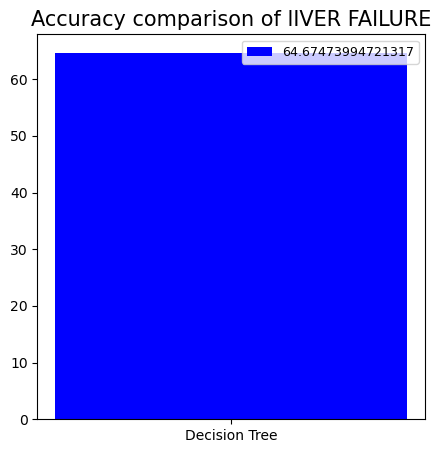

In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

DT=DecisionTreeClassifier()

DT.fit(X_train,y_train)

predictDT = DT.predict(X_test)

print("")
print('Classification report DecisionTree classifier Results:')
print("")

print(classification_report(y_test,predictDT))
print("")



x = (accuracy_score(y_test,predictDT)*100)
print('Accuracy result of DecisionTree is:', x)
print("")

cm2=confusion_matrix(y_test,predictDT)
print('Confusion Matrix result of DecissionTree Classifier is:\n',cm2)
print("")
sensitivity2 = cm2[1,1]/(cm2[1,1]+cm2[1,0])
print('Sensitivity : ', sensitivity2 )
print("")
specificity2 = cm2[0,0]/(cm2[0,0]+cm2[0,1])
print('Specificity : ', specificity2)
print("")

accuracy = cross_val_score(DT,X, y, scoring='accuracy')
print('Cross validation test results of accuracy:')
print(accuracy)
#get the mean of each fold 
print("")
print("Accuracy result of DecisionTree Classifier is:",accuracy.mean() * 100)
dt=accuracy.mean() * 100




def graph():
    import matplotlib.pyplot as plt
    data=[dt]
    alg="Decision Tree"
    plt.figure(figsize=(5,5))
    b=plt.bar(alg,data,color=("b"))
    plt.title("Accuracy comparison of lIVER FAILURE",fontsize=15)
    plt.legend(b,data,fontsize=9)




graph()

In [30]:
model_save = pickle.load(open('/Users/sreekarsontam/Desktop/liver/codes/decisiontree.h5', 'rb'))

In [35]:
predictDT = model_save.predict(X_test)

[Text(0.7723453580617495, 0.9736842105263158, 'X[3] <= -0.075\ngini = 0.5\nsamples = 533\nvalue = [267, 266]'),
 Text(0.6544677315608919, 0.9210526315789473, 'X[5] <= 0.01\ngini = 0.472\nsamples = 416\nvalue = [159, 257]'),
 Text(0.5559337478559176, 0.868421052631579, 'X[0] <= 1.626\ngini = 0.448\nsamples = 384\nvalue = [130, 254]'),
 Text(0.4411985420240137, 0.8157894736842105, 'X[4] <= -0.242\ngini = 0.435\nsamples = 369\nvalue = [118, 251]'),
 Text(0.2528945111492281, 0.7631578947368421, 'X[2] <= -0.375\ngini = 0.393\nsamples = 275\nvalue = [74, 201]'),
 Text(0.0823327615780446, 0.7105263157894737, 'X[5] <= -0.214\ngini = 0.499\nsamples = 23\nvalue = [12, 11]'),
 Text(0.0686106346483705, 0.6578947368421053, 'X[0] <= -1.444\ngini = 0.475\nsamples = 18\nvalue = [7, 11]'),
 Text(0.0548885077186964, 0.6052631578947368, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.0823327615780446, 0.6052631578947368, 'X[6] <= -0.254\ngini = 0.498\nsamples = 15\nvalue = [7, 8]'),
 Text(0.054888507

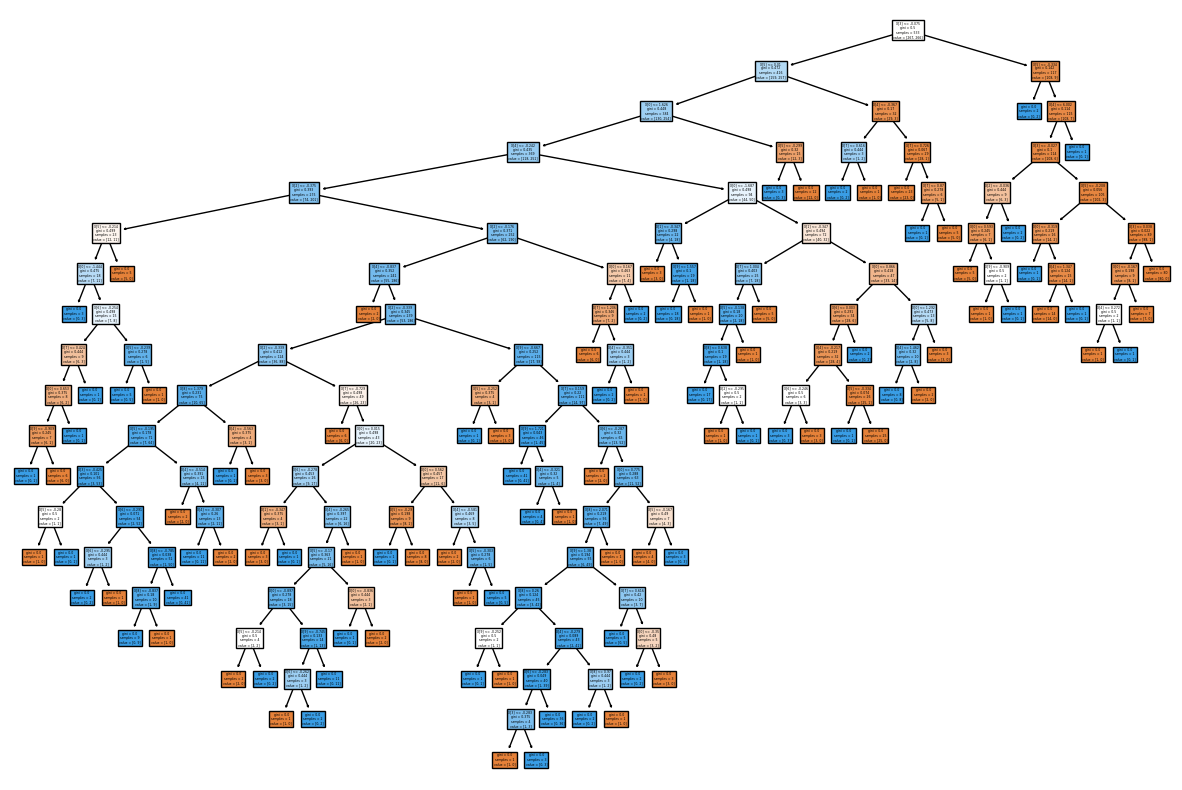

In [32]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(model_save,filled=True)

In [36]:
confusion_matrix(y_test,predictDT)

array([[86, 28],
       [17, 98]])

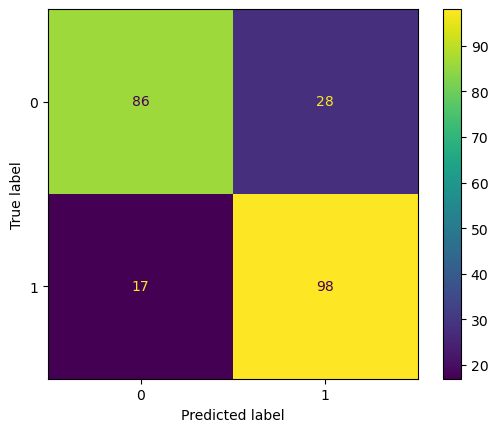

In [37]:

cm=confusion_matrix(y_test,predictDT)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

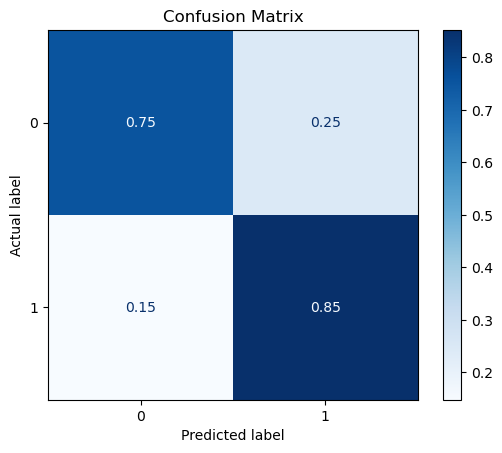

In [39]:
from sklearn.metrics import plot_confusion_matrix 
cmd = plot_confusion_matrix(model_save, X_test, y_test,
                                 display_labels=['0' ,'1'],
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion Matrix')
plt.ylabel('Actual label');

In [40]:
print(classification_report(y_test,predictDT))

              precision    recall  f1-score   support

           1       0.83      0.75      0.79       114
           2       0.78      0.85      0.81       115

    accuracy                           0.80       229
   macro avg       0.81      0.80      0.80       229
weighted avg       0.81      0.80      0.80       229



In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, roc_auc_score, precision_score,f1_score
pd.DataFrame(data=[accuracy_score(y_test, predictDT), recall_score(y_test, predictDT),
                   precision_score(y_test, predictDT), roc_auc_score(y_test, predictDT),f1_score(y_test,predictDT)], 
                   index=["accuracy", "recall", "precision", "roc_auc_score","f1_score"])

,0
accuracy,0.803493
recall,0.754386
precision,0.834951
roc_auc_score,0.803280
f1_score,0.792627
